In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import nltk
import spacy

In [21]:
# get stopwords
#nltk.download('stopwords')
#nltk.load('stopwords')
#stop=set(stopwords.words('english'))

ValueError: Could not determine format for nltk:stopwords based on its file
extension; use the "format" argument to specify the format explicitly.

### Load data

In [5]:
DATA_DIR = "../data/"

In [6]:
tweets = pd.read_csv(DATA_DIR + "tweet_scrape_2020_11_25.csv")

In [7]:
tweets

,created_at,text,tweet_id,user_screen_name,user_name,user_id,user_followers_count,user_following_count,user_statuses_count,user_likes_given_count,...,user_verified,user_description,tweet_lat,tweet_long,tweet_retweet_count,tweet_favorite_count,tweet_reply_count,tweet_hashtags,tweet_urls,tweet_media
0,2020-11-25 11:33:12+00:00,As a teacher I urge people to read this thread,1331561569545809920,teacherken,Kenneth Bernstein,30686025,4879,1926,51805,232,...,False,"punster, Quaker, blogger, teacher, senior citi...",NaN,NaN,0,0,0,[],[],NaN
1,2020-11-25 11:33:12+00:00,@Yfm @LuckyStarSA #SouthAfricaRemix \nDuring t...,1331561569940025345,Tshego_Pretty,Tshegofatso _Mashiloane,1260439985246928898,352,1187,2438,1562,...,False,Public Management and Governance Graduate 🎓\nY...,NaN,NaN,0,0,0,['SouthAfricaRemix'],['https://twitter.com/i/web/status/13315615699...,NaN
2,2020-11-25 11:33:12+00:00,Nice walk after school run! \n#lockdown #annua...,1331561571798163457,AshPeelLowes,Ashleigh Peel-Lowes,755865500,75,198,954,521,...,False,"Head of Strategy, Planning & Performance @ NHS...",NaN,NaN,0,0,0,"['lockdown', 'annualleave', 'whittledene']",[],['http://pbs.twimg.com/media/EnqoLuyW8AM0_Jv.j...
3,2020-11-25 11:33:13+00:00,Plans for the first weekend after lockdown: Ha...,1331561574268612609,ReinaaNatasha,Tash,322261324,1743,743,222597,51825,...,False,music enthusiast I guess.,NaN,NaN,0,0,0,[],[],NaN
4,2020-11-25 11:33:13+00:00,@DanKennett @nnniner The first lockdown I agre...,1331561574209871872,Dijkinho,Dijkinho,549771075,2506,316,38403,1328,...,False,Life long Liverpool FC fan. i coach youth foot...,NaN,NaN,0,0,0,[],['https://twitter.com/i/web/status/13315615742...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8173,2020-11-25 12:24:34+00:00,"Also, sharing something a bit more personal. M...",1331574497376395266,SpokonBoi,falco,1291805195815526402,123,196,1125,2311,...,False,"sad spaghetti man, I read manga sometimes",NaN,NaN,0,0,0,[],['https://twitter.com/i/web/status/13315744973...,NaN
8174,2020-11-25 12:24:34+00:00,We’re live! You can still drop in for a listen,1331574498118819845,SearleDoc,Sam,753265546146246660,151,91,107,182,...,False,Geriatrician. New parent. Existing silver Lab ...,NaN,NaN,0,0,0,[],[],NaN
8175,2020-11-25 12:24:34+00:00,@mamta_g2 Nice picture ....\nFollow protocol c...,1331574499381108740,DrJaikumarsharm,Dr.Jaikumar Parashar,976280944565895168,1,43,10,3,...,False,BVSc & A.H (veterinarian Docter),NaN,NaN,0,0,0,[],[],NaN
8176,2020-11-25 12:24:34+00:00,#TakeCorona_Serious\n78.......He said the gove...,1331574499892871170,fahimkhan___,FahimKhan,1242762168120086530,511,422,41765,1947,...,False,NaN,NaN,NaN,0,0,0,['TakeCorona_Serious'],['https://twitter.com/i/web/status/13315744998...,NaN


In [8]:
# how many tweets do we have in our dataset?
print(f"The number of tweets is: {tweets.shape[0]}")

The number of tweets is: 8178


Do we have location information?

In [9]:
tweets.tweet_lat.isnull().sum()

8175

In [10]:
tweets.tweet_long.isnull().sum()

8175

Doesn't seem like we have lat/long for locations (though we could probably get this from looking at the specific users)

How long, on average, are the tweets?

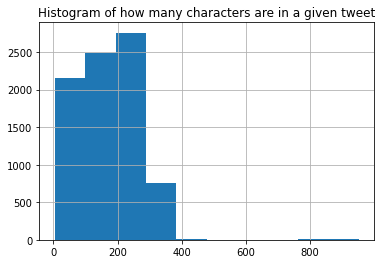

In [13]:
tweets['text'].str.len().hist()
plt.title("Histogram of how many characters are in a given tweet")
plt.show()